<a href="https://colab.research.google.com/github/MariiaKalinina/Elasticity/blob/main/Basin_worked_to_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from math import *
from scipy.special import lambertw
import matplotlib.pyplot as plt

In [2]:
# import pandas as pd

df_constast = pd.read_csv('/content/Constants.csv', delimiter=';', header=0)

df_well = pd.read_csv('/content/Well_parametrs.csv', delimiter=';', header=0)
df_well[['Depth top, m', 'Depth bottom, m']] = df_well[['Depth top, m', 'Depth bottom, m']].apply(lambda x: x / 1000)

In [ ]:
### Reference table average porosity A.58.5

# Create a list of lists
data = [
    ['Time before present (Ma)', '260', '245', '210', '160', '145', '125', '100', '80', '55', '45', '0'],
    ['Quartzite (Unit 1)', '0', '0.19', '0.16', '0.13', '0.11', '0.10', '0.09', '0.06', '0.04', '0.04', '0.04'],
    ['Anhydrite (Unit 2)', '0', '0', '0.05', '0.04', '0.04', '0.04', '0.03', '0.02', '0.02', '0.02', '0.02'],
    ['Sandstone (Unit 3)', '0', '0', '0', '0.46', '0.41', '0.38', '0.32', '0.22', '0.17', '0.15', '0.15'],
    ['Dolomite (Unit 4)', '0', '0', '0', '0', '0.17', '0.14', '0.09', '0.04', '0.02', '0.02', '0.02'],
    ['Limestones (Unit 5)', '0', '0', '0', '0', '0', '0.37', '0.24', '0.10', '0.05', '0.04', '0.04'],
    ['Sandstones (Unit 6)', '0', '0', '0', '0', '0', '0', '0.42', '0.28', '0.21', '0.19', '0.18'],
    ['Chalk (Unit 7)', '0', '0', '0', '0', '0', '0', '0', '0.37', '0.15', '0.11', '0.10'],
    ['Shales (Unit 8)', '0', '0', '0', '0', '0', '0', '0', '0', '0.45', '0.33', '0.31'],
    ['Sandstones (Unit 9)', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.44', '0.41'],
    ['Shales (Unit 10)', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.52']
]

# Create a Pandas DataFrame from the list of lists
porosity_reference = pd.DataFrame(data[1:], columns=data[0])

# Write the DataFrame to a CSV file
porosity_reference.to_csv('porosity_reference.csv', index=False)


In [ ]:
df_well

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
0,Test_well,Erosion,Erosion,NaN,0,0.00,0.00,0,NaN,300,0,1,NaN,NaN,NaN,NaN
1,Test_well,Layer 10,Erosion,Shales,0,0.00,0.20,200,NaN,300,0,1,NaN,NaN,NaN,NaN
2,Test_well,Layer 9,Deposition,Sandstones,45,0.20,0.45,250,NaN,325,40,1,NaN,NaN,NaN,NaN
3,Test_well,Layer 8,Deposition,Shales,55,0.45,1.20,750,NaN,350,50,1,Reservoir,NaN,NaN,NaN
4,Test_well,Layer 7,Deposition,Chalk,80,1.20,2.50,1300,NaN,300,100,1,NaN,NaN,NaN,NaN
5,Test_well,Layer 6,Deposition,Sandstones,100,2.50,3.40,900,NaN,200,80,1,NaN,NaN,NaN,NaN
6,Test_well,Layer 5,Deposition,Limestones,125,3.40,3.60,200,NaN,20,70,10,NaN,NaN,NaN,NaN
7,Test_well,Layer 4,Deposition,Dolomite,145,3.60,4.00,400,NaN,20,-40,1,Reservoir,NaN,NaN,NaN
8,Test_well,Layer 3,Deposition,Sandstones,160,4.00,4.25,250,NaN,10,-20,1,NaN,NaN,NaN,NaN
9,Test_well,Layer 2,Deposition,Anhydrite,210,4.25,5.00,750,NaN,20,0,10,NaN,NaN,NaN,NaN


In [ ]:
df_constast

,Lithology_type,Porosity,"Exp_decay, km-1",Grain density,TC matrix,Radiogenic Heat Production,Ki_framework
0,Shales,0.63,0.51,2720,2.0,1.700000e-06,2.0
1,Sandstones,0.49,0.27,2650,5.5,1.200000e-06,5.5
2,Chalk,0.70,0.71,2710,3.3,4.000000e-07,3.3
3,Limestones,0.40,0.60,2710,3.3,5.000000e-07,3.3
4,Dolomite,0.20,0.60,2870,5.3,4.000000e-07,5.3
5,Anhydrite,0.05,0.20,2960,6.3,1.000000e-07,6.3
6,Quartzite,0.20,0.30,2650,7.7,5.000000e-07,7.7
7,Fundament,0.00,0.00,2800,3.0,2.800000e-06,3.0


In [3]:
### Кол-во слоев по которым будет проходит расчет.
### Не учитывает первый слой - Эрозию и последний - Фундамент
layers_quantity = len(df_well[1:df_well.shape[0]-1]) #amount of layers for calculation
layers_quantity

10

In [4]:
work_layers = df_well[1:df_well.shape[0]-1] ### Слои, по которым идет расчет
work_layers

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
1,Test_well,Layer 10,Erosion,Shales,0,0.00,0.20,200,NaN,300,0,1,NaN,NaN,NaN,NaN
2,Test_well,Layer 9,Deposition,Sandstones,45,0.20,0.45,250,NaN,325,40,1,NaN,NaN,NaN,NaN
3,Test_well,Layer 8,Deposition,Shales,55,0.45,1.20,750,NaN,350,50,1,Reservoir,NaN,NaN,NaN
4,Test_well,Layer 7,Deposition,Chalk,80,1.20,2.50,1300,NaN,300,100,1,NaN,NaN,NaN,NaN
5,Test_well,Layer 6,Deposition,Sandstones,100,2.50,3.40,900,NaN,200,80,1,NaN,NaN,NaN,NaN
6,Test_well,Layer 5,Deposition,Limestones,125,3.40,3.60,200,NaN,20,70,10,NaN,NaN,NaN,NaN
7,Test_well,Layer 4,Deposition,Dolomite,145,3.60,4.00,400,NaN,20,-40,1,Reservoir,NaN,NaN,NaN
8,Test_well,Layer 3,Deposition,Sandstones,160,4.00,4.25,250,NaN,10,-20,1,NaN,NaN,NaN,NaN
9,Test_well,Layer 2,Deposition,Anhydrite,210,4.25,5.00,750,NaN,20,0,10,NaN,NaN,NaN,NaN
10,Test_well,Layer 1,Deposition,Quartzite,245,5.00,5.40,400,NaN,0,0,1,NaN,NaN,NaN,NaN


In [ ]:
# filtered_df = df_well[df_well['Event_name'] != 'Erosion']

In [5]:
def decomp_func(y1, y2, y1_d, phi, c):  # возвращает фун-ию одной переменной, для которой затем подбирается параметр y2_d

    y2_d = (np.exp(-np.log(e) * y1_d * c) * phi * np.log(e) - \
            np.exp(-np.log(e) * y1 * c) * phi * np.log(e) + \
            np.exp(-np.log(e) * y2 * c) * phi * np.log(e) - \
            np.log(e) * y1 * c + np.log(e) * y1_d * c + np.log(e) * y2 * c + \
            lambertw(-np.log(e) * phi * np.exp(-np.exp(-np.log(e) * y1_d * c) * phi * np.log(e) +\
                                               np.exp(-np.log(e) * y1 * c) * phi * np.log(e) - \
                                               np.exp(-np.log(e) * y2 * c) * phi * np.log(e) + \
                                               np.log(e) * y1 * c - \
                                               np.log(e) * y1_d * c - np.log(e) * y2 * c))) / c / np.log(e)
    return y2_d.real

In [6]:
#считает скорректированную декомпактированную глубину
def corrected(depth, RoMantle, RoWater, sea_level, sea_level_today):
  return depth - sea_level_today * (RoWater / (RoMantle - RoWater)) + (sea_level - sea_level_today)

In [8]:
### the averaeg porosity of a stratigraphic unit at any depth [A.58.6]
def porosity_func(surface_porosity, exp_decay, y1, y2):
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/(y2 - y1))

In [10]:
### the averaeg porosity of a stratigraphic unit at any depth [A.58.6]
def porosity_full_func(surface_porosity, exp_decay, y):
  return surface_porosity*np.exp(-exp_decay*y)

In [38]:
por, c = 0.63, 0.51
# por, c = 0.49, 0.27

print(porosity_full_func(por, c, 0.2))
print(porosity_full_func(por, c, 0.25))
print(porosity_full_func(por, c, 0.3-0.5))

# 0.63, 0.51
# 0.49, 0.27


0.5689086175513923
0.5545848519755593
0.697651587188598


In [ ]:
# decompaction_df = pd.DataFrame() ### <-- Decompacted thicknesses (km). Table A58.3

# age = list(df_well['Age (Ma)'][1:])

# for i, a in enumerate(age, start=0):
#     print('Age', a)

#     work_layers_copy = work_layers.copy()
#     rows_to_delete = []
#     thinkness_list = []

#     for row_index, row in enumerate(work_layers_copy[i::].itertuples(), start=i):

#       lithology = work_layers_copy.at[row.Index, 'Lithology_type']
#       layers_name = work_layers_copy.at[row.Index, 'Event_name']

#       if row_index == i: #<--- если первый слов, то y1 decompaced = 0
#         y1_d = 0

#       else:
#         y1_d = y2_d

#       phi0 = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Porosity'].iloc[0]
#       c = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Exp_decay, km-1'].iloc[0]
#       y1 = df_well.loc[df_well['Event_name'] == str(layers_name), 'Depth top, m'].iloc[0]
#       y2 = df_well.loc[df_well['Event_name'] == str(layers_name), 'Depth bottom, m'].iloc[0]

#       y2_d = decomp_func(y1, y2, y1_d, phi0, c)

#       thicknesses = np.round(y2_d - y1_d, 3) #A58.3
#       thinkness_list.append(thicknesses)

#       print(row_index, lithology, layers_name, thicknesses)
#     print(sum(thinkness_list), end='\n\n')

#     ### Save result in table
#     resized_list = np.zeros(10)
#     resized_list[:len(thinkness_list)] = thinkness_list

#     new_col_values = resized_list[::-1]
#     new_col_name = f'{a} Ma'
#     decompaction_df[new_col_name] = new_col_values

In [71]:
def integrate_porosity(n0, c, z1, z2):
    """

    Parameters
    ----------
    n0 : float
        porosity at the surface
    c : float
        compressibility (units ...)
    z1 : float
        depth top of unit (m)
    z2 : float
        depth base of unit (m)

    Returns
    -------
    n_int : float
        integrated porosity over depth interval
    """

    b_w = n0 / c * (np.exp(-c * z1) - np.exp(-c * z2))

    n_int = b_w / (z2 - z1)

    return n_int

In [78]:
decompaction_df = pd.DataFrame() ### <-- Decompacted thicknesses (km). Table A58.3
decompaction_corrected_df = pd.DataFrame() ### <-- Decompacted thicknesses (km). Table A58.4
porosity_df = pd.DataFrame() ### <-- Porosities as a function of time for 10 lithological units undergoing progressive compaction during burial.
                            ### Table A58.4

age_list = list(df_well['Age (Ma)'][1:])

for i, age in enumerate(age_list, start=0):

    work_layers_copy = work_layers.copy()

    thinkness_list = []
    thinkness_corrected_list = []
    porosity_average_list = []
    porosity_test = []

    RoWater, RoMantle = 1000, 3300
    sea_level = df_well.loc[df_well['Age (Ma)'] == int(age), 'Paleobathymetry, Ma'].iloc[0]/1000
    sea_level_today = df_well.loc[df_well['Age (Ma)'] == int(age), 'Sea level, m'].iloc[0]/1000

    print('Age', age)

### расчет corrected_decompaction for Fundament (not in work_layer)
    if int(age) == age_list[-1]:
          depth = 0
          y2_d_corrected = corrected(depth, RoMantle, RoWater, sea_level, sea_level_today)
          thinkness_corrected_list.append(y2_d_corrected)

### расчет для слоев с заданной литологией (work_layers)
    for row_index, row in enumerate(work_layers_copy[i::].itertuples(), start=i):

      lithology = work_layers_copy.at[row.Index, 'Lithology_type']
      layers_name = work_layers_copy.at[row.Index, 'Event_name']

      phi0 = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Porosity'].iloc[0]
      c = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Exp_decay, km-1'].iloc[0]
      y1 = df_well.loc[df_well['Event_name'] == str(layers_name), 'Depth top, m'].iloc[0]
      y2 = df_well.loc[df_well['Event_name'] == str(layers_name), 'Depth bottom, m'].iloc[0]


      if row_index == i: #<--- если первый слов, то y1 decompaced = 0

        y1_d = 0
        y1_d_corrected = corrected(y1_d, RoMantle, RoWater, sea_level, sea_level_today)

        y2_d = decomp_func(y1, y2, y1_d, phi0, c)
        y2_d_corrected = corrected(y2_d, RoMantle, RoWater, sea_level, sea_level_today)

        thicknesses = np.round(y2_d - y1_d, 3) #A58.3

        thinkness_list.append(thicknesses)
        thinkness_corrected_list.append(y2_d_corrected)

        # if age == 0:
        #   pass

      else:
        y1_d = y2_d

        y1_d_corrected = corrected(y1_d, RoMantle, RoWater, sea_level, sea_level_today)
        y2_d = decomp_func(y1, y2, y1_d, phi0, c)
        y2_d_corrected = corrected(y2_d, RoMantle, RoWater, sea_level, sea_level_today)

        thicknesses = np.round(y2_d - y1_d, 3) #A58.3

        thinkness_list.append(thicknesses)
        thinkness_corrected_list.append(y2_d_corrected)

      porosity = np.round(porosity_func(phi0, c, y2_d_corrected, 0), 2)
      print(phi0*np.exp(-c*y1_d_corrected), integrate_porosity(phi0, c, y1_d, y2_d))

      print(row_index, lithology,":", thicknesses,
            np.round(y1_d_corrected, 3), np.round(y2_d_corrected, 3),
            np.round(y2_d_corrected - y1_d_corrected, 3), porosity)
    print(sum(thinkness_list), end='\n\n')


#       # else:
#       #   y2_d = y1_d
#         y2_d_corrected = y1_d_corrected
# ### decompaction depth
#       y2_d = decomp_func(y1, y2, y1_d, phi0, c)
#       thicknesses = np.round(y2_d - y1_d, 3) #A58.3
#       thinkness_list.append(thicknesses)
# ### corrected decompaction depth
#       print(np.round(corrected(thicknesses, RoMantle, RoWater, sea_level, sea_level_today), 3))

#       y2_d_corrected = np.round(corrected(y2_d, RoMantle, RoWater, sea_level, sea_level_today), 3)
#       thinkness_corrected_list.append(y2_d_corrected)
# ### porosity
#       porosity = np.round(porosity_func(phi0, c, y1_d_corrected-0.03, y2_d_corrected), 2)
#       porosity_1 = np.round(porosity_full_func(phi0, c, (y2_d - y1_d)-0.03), 2)

#       porosity_average_list.append(porosity)
#       porosity_test.append(porosity_1)



# ### decompaction depth


    #   print(row_index, lithology, layers_name, thicknesses, y2_d_corrected)
    # print(sum(thinkness_list))

    # print(porosity_average_list[::-1])
    # print(porosity_test[::-1])

    # print(thinkness_list)
    # print(thinkness_corrected_list, end='\n\n')

 ### Save results in table
    new_col_name = f'{age}'

    ### Save result for decompaction in table
    resized_list = np.zeros(10)
    resized_list[:len(thinkness_list)] = thinkness_list

    new_col_values = resized_list[::-1]
    decompaction_df[new_col_name] = new_col_values

    ### Save result for corrected decompaction in table
    resized_list_new = np.zeros(10)
    resized_list_new[len(resized_list_new) - len(thinkness_corrected_list):] = thinkness_corrected_list

    new_col_values_new = resized_list_new
    decompaction_corrected_df[new_col_name] = new_col_values_new

    ### Save result for average porosity in table
    resized_list = np.zeros(10)
    resized_list[len(resized_list) - len(porosity_average_list):] = porosity_average_list
    # print()
    # resized_list[:len(thinkness_list)] = porosity_average_list
    new_col_values = resized_list
    porosity_df[new_col_name] = new_col_values

Age 0
0.5406217247411781 0.598935122045173
0 Shales : 0.2 0.3 0.5 0.2 0.56
0.428120796727137 0.4489202377027578
1 Sandstones : 0.25 0.5 0.75 0.25 0.44
0.4297569513151649 0.41615529582753036
2 Shales : 0.75 0.75 1.5 0.75 0.44
0.24130949833705417 0.19496668991542246
3 Chalk : 1.3 1.5 2.8 1.3 0.3
0.23007501113097162 0.2214871460776463
4 Sandstones : 0.9 2.8 3.7 0.9 0.31
0.043443643529983186 0.04901196613454461
5 Limestones : 0.2 3.7 3.9 0.2 0.15
0.0192655276460986 0.020505973123875032
6 Dolomite : 0.4 3.9 4.3 0.4 0.07
0.15345469718236346 0.1609100040510705
7 Sandstones : 0.25 4.3 4.55 0.25 0.28
0.0201262112016818 0.019845163592428106
8 Anhydrite : 0.75 4.55 5.3 0.75 0.03
0.0407851223468427 0.04205243510802524
9 Quartzite : 0.4 5.3 5.7 0.4 0.1
5.4

Age 45
0.4558441812247897 0.47310342187715443
1 Sandstones : 0.261 0.268 0.529 0.261 0.46
0.4810097142366084 0.45271789387692773
2 Shales : 0.8 0.529 1.329 0.8 0.46
0.27242308872613363 0.21316575176926983
3 Chalk : 1.33 1.329 2.659 1.33 0.31
0.2

In [63]:
df_constast

,Lithology_type,Porosity,"Exp_decay, km-1",Grain density,TC matrix,Radiogenic Heat Production,Ki_framework
0,Shales,0.63,0.51,2720,2.0,1.700000e-06,2.0
1,Sandstones,0.49,0.27,2650,5.5,1.200000e-06,5.5
2,Chalk,0.70,0.71,2710,3.3,4.000000e-07,3.3
3,Limestones,0.40,0.60,2710,3.3,5.000000e-07,3.3
4,Dolomite,0.20,0.60,2870,5.3,4.000000e-07,5.3
5,Anhydrite,0.05,0.20,2960,6.3,1.000000e-07,6.3
6,Quartzite,0.20,0.30,2650,7.7,5.000000e-07,7.7
7,Fundament,0.00,0.00,2800,3.0,2.800000e-06,3.0


In [ ]:
decompaction_corrected_df

,0 Ma,45 Ma,55 Ma,80 Ma,100 Ma,125 Ma,145 Ma,160 Ma,210 Ma,245 Ma,260 Ma
0,0.50,0.268,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.75,0.529,0.278,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.50,1.329,1.166,0.157,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,2.80,2.659,2.539,1.904,0.085,0.000,0.000,0.000,0.000,0.000,0.000
4,3.70,3.567,3.456,2.863,1.290,0.080,0.000,0.000,0.000,0.000,0.000
5,3.90,3.767,3.658,3.068,1.522,0.220,0.077,0.000,0.000,0.000,0.000
6,4.30,4.168,4.059,3.475,1.958,0.715,0.600,0.039,0.000,0.000,0.000
7,4.55,4.419,4.312,3.735,2.251,1.052,0.953,0.431,0.020,0.000,0.000
8,5.30,5.170,5.063,4.487,3.009,1.815,1.718,1.199,0.791,0.000,0.000
9,5.70,5.570,5.464,4.891,3.425,2.244,2.150,1.640,1.241,0.471,0.034


In [ ]:
decompaction_df.loc['Stratigraphic thickness (km)', :] = decompaction_df.sum(axis=0) # <-- ввод общией мощности

### добавление колонок Lithology_typeб	Event_name
work_layers.reset_index(drop=True, inplace=True)
decompaction_df['Event_name'] = work_layers['Event_name']
decompaction_df['Lithology_type'] = work_layers['Lithology_type']
decompaction_df = decompaction_df[decompaction_df.columns[::-1]]

decompaction_df.to_csv('/content/Decompaction.csv', index=True)

In [ ]:
### добавление колонок Lithology_type,	Event_name
# work_layers.reset_index(drop=True, inplace=True)
decompaction_corrected_df['Event_name'] = work_layers['Event_name']
decompaction_corrected_df['Lithology_type'] = work_layers['Lithology_type']
decompaction_corrected_df = decompaction_corrected_df[decompaction_corrected_df.columns[::-1]]

decompaction_corrected_df.to_csv('/content/Decompaction_corrected.csv', index=True)

In [ ]:
### добавление колонок Lithology_type,	Event_name
work_layers.reset_index(drop=True, inplace=True)
porosity_df['Event_name'] = work_layers['Event_name']
porosity_df['Lithology_type'] = work_layers['Lithology_type']
porosity_df = porosity_df[porosity_df.columns[::-1]]

porosity_df.to_csv('/content/Porosity.csv', index=True)

In [ ]:
decompaction_corrected_df

,Lithology_type,Event_name,260,245,210,160,145,125,100,80,55,45,0
0,Shales,Layer 10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.268,0.50
1,Sandstones,Layer 9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.278,0.529,0.75
2,Shales,Layer 8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.157,1.166,1.329,1.50
3,Chalk,Layer 7,0.000,0.000,0.000,0.000,0.000,0.000,0.085,1.904,2.539,2.659,2.80
4,Sandstones,Layer 6,0.000,0.000,0.000,0.000,0.000,0.080,1.290,2.863,3.456,3.567,3.70
5,Limestones,Layer 5,0.000,0.000,0.000,0.000,0.077,0.220,1.522,3.068,3.658,3.767,3.90
6,Dolomite,Layer 4,0.000,0.000,0.000,0.039,0.552,0.678,1.945,3.473,4.059,4.168,4.30
7,Sandstones,Layer 3,0.000,0.000,0.020,0.431,0.908,1.018,2.239,3.733,4.312,4.419,4.55
8,Anhydrite,Layer 2,0.000,0.000,0.791,1.199,1.673,1.781,2.997,4.485,5.062,5.169,5.30
9,Quartzite,Layer 1,0.034,0.471,1.241,1.640,2.107,2.210,3.413,4.889,5.464,5.570,5.70


In [ ]:
porosity_df

,Lithology_type,Event_name,260,245,210,160,145,125,100,80,55,45,0
0,Shales,Layer 10,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60
1,Sandstones,Layer 9,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47,0.45
2,Shales,Layer 8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.51,0.45,0.42
3,Chalk,Layer 7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.24,0.21,0.19
4,Sandstones,Layer 6,0.0,0.00,0.00,0.00,0.00,0.00,0.42,0.27,0.24,0.23,0.22
5,Limestones,Layer 5,0.0,0.00,0.00,0.00,0.00,0.37,0.18,0.07,0.06,0.05,0.05
6,Dolomite,Layer 4,0.0,0.00,0.00,0.00,0.17,0.15,0.07,0.03,0.02,0.02,0.02
7,Sandstones,Layer 3,0.0,0.00,0.00,0.47,0.41,0.38,0.29,0.19,0.17,0.17,0.16
8,Anhydrite,Layer 2,0.0,0.00,0.05,0.04,0.04,0.04,0.03,0.02,0.02,0.02,0.02
9,Quartzite,Layer 1,0.0,0.19,0.15,0.13,0.12,0.11,0.08,0.05,0.04,0.04,0.04


In [ ]:

por = pd.read_csv('/content/reference.csv', header=0)
por

,Time before present (Ma),260,245,210,160,145,125,100,80,55,45,0
0,Quartzite (Unit 1),0,0.19,0.16,0.13,0.11,0.10,0.09,0.06,0.04,0.04,0.04
1,Anhydrite (Unit 2),0,0.00,0.05,0.04,0.04,0.04,0.03,0.02,0.02,0.02,0.02
2,Sandstone (Unit 3),0,0.00,0.00,0.46,0.41,0.38,0.32,0.22,0.17,0.15,0.15
3,Dolomite (Unit 4),0,0.00,0.00,0.00,0.17,0.14,0.09,0.04,0.02,0.02,0.02
4,Limestones (Unit 5),0,0.00,0.00,0.00,0.00,0.37,0.24,0.10,0.05,0.04,0.04
5,Sandstones (Unit 6),0,0.00,0.00,0.00,0.00,0.00,0.42,0.28,0.21,0.19,0.18
6,Chalk (Unit 7),0,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.15,0.11,0.10
7,Shales (Unit 8),0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.33,0.31
8,Sandstones (Unit 9),0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.44,0.41
9,Shales (Unit 10),0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.52


In [ ]:

table_mine = pd.DataFrame(porosity_df.iloc[:, 2:porosity_df.shape[1]])
table_mine = table_mine.apply(lambda x: x.astype(float))

table_ref = pd.DataFrame(por[::-1].iloc[:, 1:por.shape[1]])
table_ref = table_ref.apply(lambda x: x.astype(float))

# Reset the index and column labels of both dataframes
table_mine = table_mine.reset_index(drop=True)
table_ref = table_ref.reset_index(drop=True)

# Rename the columns of table_ref to match table_mine
table_ref = table_ref.rename(columns=dict(zip(table_ref.columns, table_mine.columns)))

# Perform the subtraction
result = table_mine.subtract(table_ref)*100

In [ ]:
def highlight_value(s):
    return ['background-color: red; color: white' if v < 0 else 'background-color: red; color: white' if v > 0 else '' for v in s]

styled_df = result.style.apply(highlight_value)
styled_df

,260,245,210,160,145,125,100,80,55,45,0
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,12.000000,11.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,9.000000,10.000000,9.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,3.000000,4.000000,4.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-3.000000,1.000000,1.000000,1.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,-1.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.000000,-3.000000,0.000000,2.000000,1.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000


### 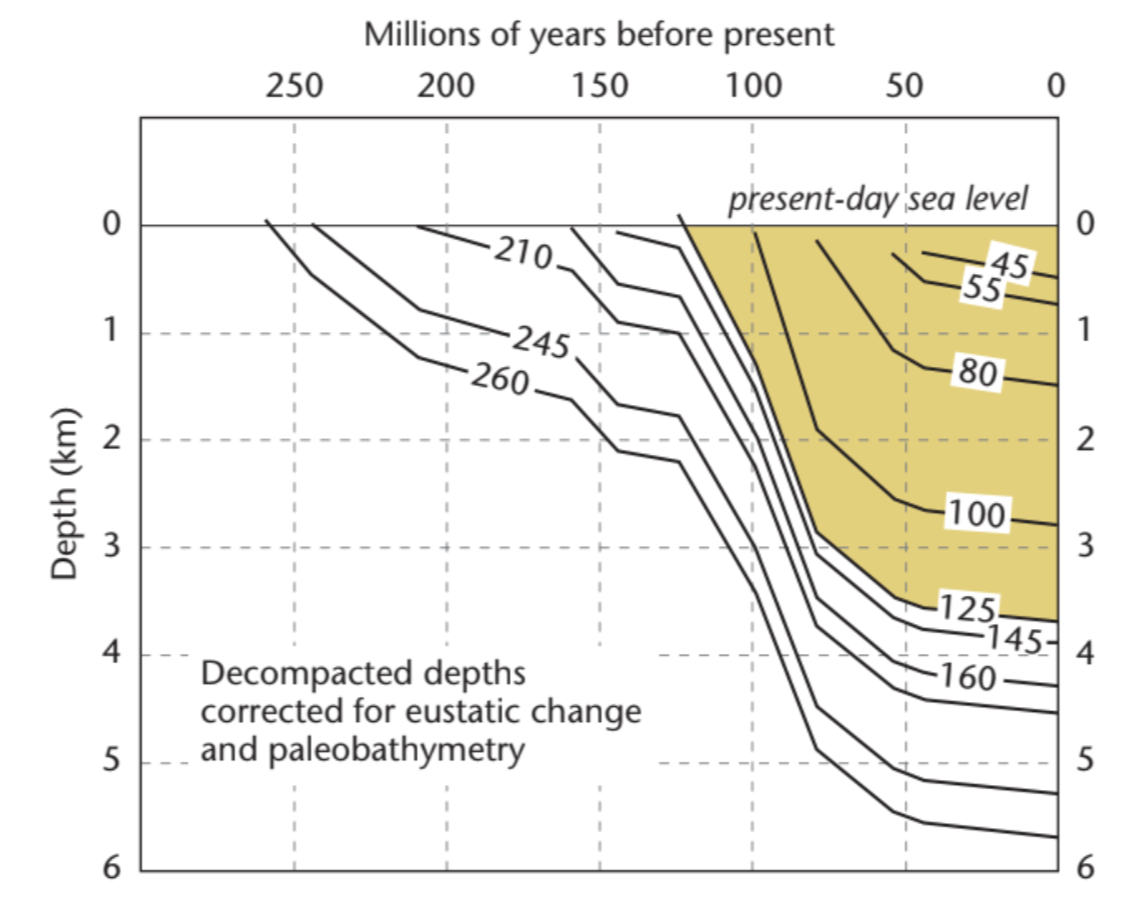Plots Age - Corrected decompacted depth

In [ ]:
work_layers = decompaction_corrected_df.drop(['Lithology_type', 'Event_name'], axis=1, inplace=False)

In [ ]:
age_values = [int(age.split(' Ma')[0]) for age in work_layers.columns.tolist()]

In [ ]:
work_layers

,260,245,210,160,145,125,100,80,55,45,0
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.268,0.50
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.278,0.529,0.75
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.157,1.166,1.329,1.50
3,0.000,0.000,0.000,0.000,0.000,0.000,0.085,1.904,2.539,2.659,2.80
4,0.000,0.000,0.000,0.000,0.000,0.080,1.290,2.863,3.456,3.567,3.70
5,0.000,0.000,0.000,0.000,0.077,0.220,1.522,3.068,3.658,3.767,3.90
6,0.000,0.000,0.000,0.039,0.552,0.678,1.945,3.473,4.059,4.168,4.30
7,0.000,0.000,0.020,0.431,0.908,1.018,2.239,3.733,4.312,4.419,4.55
8,0.000,0.000,0.791,1.199,1.673,1.781,2.997,4.485,5.062,5.169,5.30
9,0.034,0.471,1.241,1.640,2.107,2.210,3.413,4.889,5.464,5.570,5.70


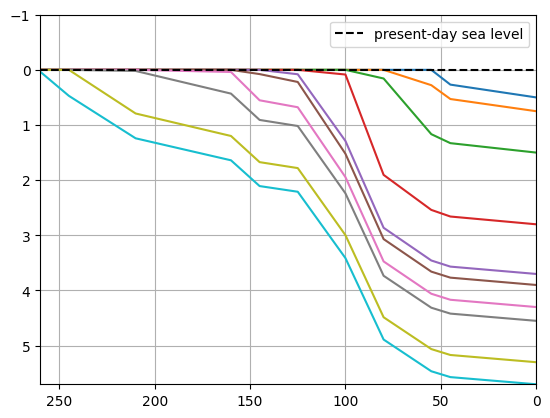

In [ ]:
work_layers_copy = work_layers.copy()


for row_index, row in work_layers_copy.iterrows():
  plt.plot(age_values, row.values)

# print(np.max(work_layers_copy), np.min(work_layers_copy))

# print(len(work_layers_copy.shape[]), len(row.values))

plt.plot(age_values, np.zeros(work_layers_copy.shape[1]), 'k--',
         label='present-day sea level')


plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.axis([np.round(np.max(age_values), -1), np.min(age_values),
          np.max(work_layers_copy), np.min(work_layers_copy)-1])

plt.legend()
plt.grid()

In [ ]:
# decompaction_df.style.applymap(lambda x: "background-color: red" if x>0 else "background-color: white")

In [ ]:
#считает скорректированную декомпактированную глубину
def corrected_decompaction(depth,
                           RoMantle, RoWater,
                           sea_level, sea_level_today):

  return depth - sea_level_today * (RoWater / (RoMantle - RoWater)) + (sea_level - sea_level_today)

In [ ]:
corrected_decompaction(0, 3300, 1000, -0.02, 0.01)

-0.03434782608695652

In [ ]:
corrected_decompaction(4.7, 3300, 1000, -0.02, 0.01)

4.665652173913044

In [ ]:
5.056521739130435 - -0.34347826086956523

5.4

In [ ]:
decompaction = pd.read_csv('/content/Decompaction.csv', header=0)
decompaction.set_index(decompaction.columns[0], inplace=True)
decompaction = decompaction.rename_axis('Index', inplace=False)

In [ ]:
df_well

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
0,Test_well,Erosion,Erosion,NaN,0,0.00,0.00,0,NaN,300,0,1,NaN,NaN,NaN,NaN
1,Test_well,Layer 10,Erosion,Shales,0,0.00,0.20,200,NaN,300,0,1,NaN,NaN,NaN,NaN
2,Test_well,Layer 9,Deposition,Sandstones,45,0.20,0.45,250,NaN,325,40,1,NaN,NaN,NaN,NaN
3,Test_well,Layer 8,Deposition,Shales,55,0.45,1.20,750,NaN,350,50,1,Reservoir,NaN,NaN,NaN
4,Test_well,Layer 7,Deposition,Chalk,80,1.20,2.50,1300,NaN,300,100,1,NaN,NaN,NaN,NaN
5,Test_well,Layer 6,Deposition,Sandstones,100,2.50,3.40,900,NaN,200,80,1,NaN,NaN,NaN,NaN
6,Test_well,Layer 5,Deposition,Limestones,125,3.40,3.60,200,NaN,20,70,10,NaN,NaN,NaN,NaN
7,Test_well,Layer 4,Deposition,Dolomite,145,3.60,4.00,400,NaN,20,-40,1,Reservoir,NaN,NaN,NaN
8,Test_well,Layer 3,Deposition,Sandstones,160,4.00,4.25,250,NaN,10,-20,1,NaN,NaN,NaN,NaN
9,Test_well,Layer 2,Deposition,Anhydrite,210,4.25,5.00,750,NaN,20,0,10,NaN,NaN,NaN,NaN


In [ ]:
decompaction

,Lithology_type,Event_name,260 Ma,245 Ma,210 Ma,160 Ma,145 Ma,125 Ma,100 Ma,80 Ma,55 Ma,45 Ma,0 Ma
Index,,,,,,,,,,,,,
0,Shales,Layer 10,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.40
1,Sandstones,Layer 9,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.401,0.75
2,Shales,Layer 8,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.401,0.750,0.25
3,Chalk,Layer 7,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.404,0.751,0.251,0.40
4,Sandstones,Layer 6,0.0,0.000,0.000,0.000,0.000,0.000,0.416,0.752,0.253,0.401,0.20
5,Limestones,Layer 5,0.0,0.000,0.000,0.000,0.000,0.429,0.758,0.260,0.402,0.201,0.90
6,Dolomite,Layer 4,0.0,0.000,0.000,0.000,0.433,0.763,0.293,0.407,0.201,0.907,1.30
7,Sandstones,Layer 3,0.0,0.000,0.000,0.442,0.765,0.337,0.436,0.205,0.917,1.330,0.75
8,Anhydrite,Layer 2,0.0,0.000,0.450,0.768,0.353,0.495,0.232,0.959,1.374,0.800,0.25


In [ ]:
decompaction.columns.tolist()

['Lithology_type',
 'Event_name',
 '260 Ma',
 '245 Ma',
 '210 Ma',
 '160 Ma',
 '145 Ma',
 '125 Ma',
 '100 Ma',
 '80 Ma',
 '55 Ma',
 '45 Ma',
 '0 Ma']

In [ ]:
work_layers = decompaction.drop(['Lithology_type', 'Event_name'], axis=1, inplace=False)

In [ ]:
df_decompaction_corrected = pd.DataFrame()

age_values = [age.split('Ma')[0] for age in work_layers.columns.tolist()]

for age, (col_name, col_data) in zip(age_values, work_layers.iloc[:-1].items()):
    depth = []

    RoWater, RoMantle = 1000, 3300
    sea_level = df_well.loc[df_well['Age (Ma)'] == int(age), 'Paleobathymetry, Ma'].iloc[0]/1000
    sea_level_today = df_well.loc[df_well['Age (Ma)'] == int(age), 'Sea level, m'].iloc[0]/1000
    # print('Age', age)
    # print([col_data], end='\n\n')
    print('Age', age, sea_level, sea_level_today)

    depth = list(col_data[1:])
    # depth = [x * 1000 for x in depth]
    print(depth)

    corrected_thicknesses = corrected_decompaction(depth, RoMantle, RoWater,
                              sea_level, sea_level_today)

    print(corrected_thicknesses, end='\n\n')


Age 260  -0.02 0.01
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[-0.03434783 -0.03434783 -0.03434783 -0.03434783 -0.03434783 -0.03434783
 -0.03434783 -0.03434783 -0.03434783]

Age 245  0.0 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.471]
[0.    0.    0.    0.    0.    0.    0.    0.    0.471]

Age 210  0.02 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.45, 0.771]
[0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.47  0.791]

Age 160  0.01 -0.02
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.442, 0.768, 0.392]
[0.03869565 0.03869565 0.03869565 0.03869565 0.03869565 0.03869565
 0.48069565 0.80669565 0.43069565]

Age 145  0.02 -0.04
[0.0, 0.0, 0.0, 0.0, 0.0, 0.433, 0.765, 0.353, 0.522]
[0.0773913 0.0773913 0.0773913 0.0773913 0.0773913 0.5103913 0.8423913
 0.4303913 0.5993913]

Age 125  0.02 0.07
[0.0, 0.0, 0.0, 0.0, 0.429, 0.763, 0.337, 0.495, 0.3]
[-0.08043478 -0.08043478 -0.08043478 -0.08043478  0.34856522  0.68256522
  0.25656522  0.41456522  0.21956522]

Age 100  0.2 0.08
[0.0, 0.0, 0.0, 0.416, 0.758, 